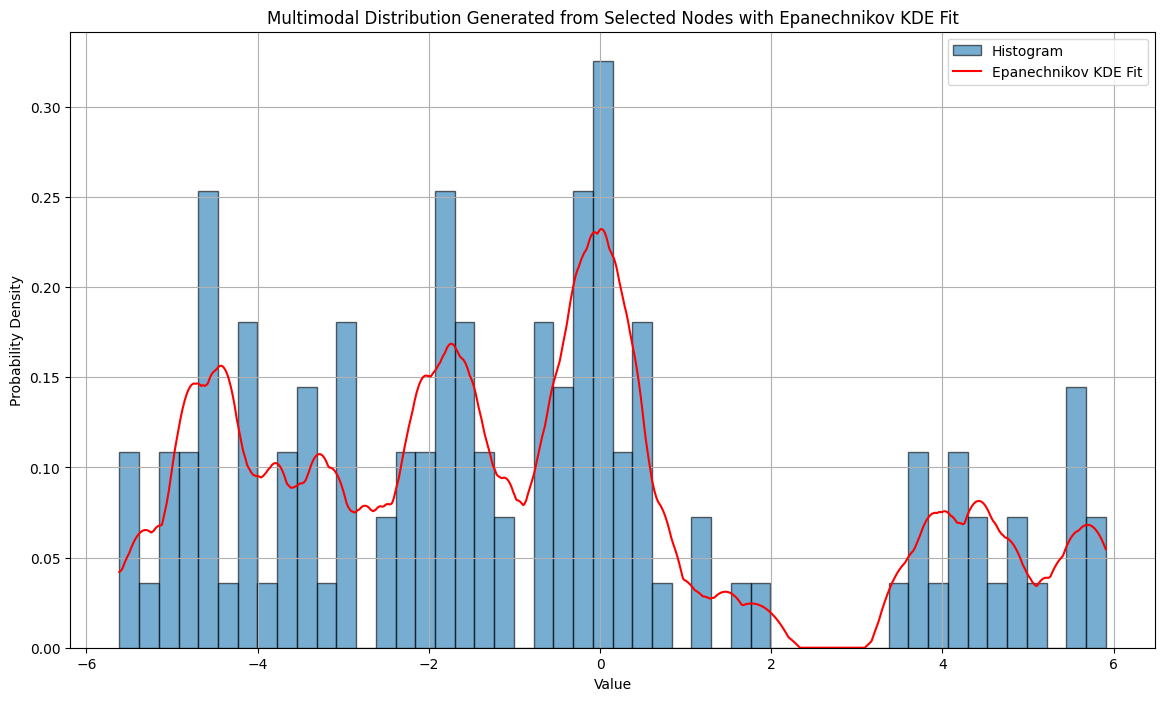

In [8]:
#Generate multimodal distributions


import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

def metropolis_hastings_node(node_index, initial_pos, num_samples, proposal_std, means, stds):
    samples = np.zeros(num_samples)
    samples[0] = initial_pos

    mean = means[node_index]
    std = stds[node_index]

    for i in range(1, num_samples):
        current_pos = samples[i - 1]
        proposed_pos = current_pos + np.random.normal(0, proposal_std)

        proposed_pos = np.clip(proposed_pos, -10, 10)

        current_prob = norm.pdf(current_pos, mean, std)
        proposed_prob = norm.pdf(proposed_pos, mean, std)
        
        acceptance_ratio = proposed_prob / current_prob
        acceptance_probability = min(1, acceptance_ratio)

        if np.random.rand() < acceptance_probability:
            samples[i] = proposed_pos
        else:
            samples[i] = current_pos

    return samples

def generate_multimodal_distribution_from_nodes(num_nodes, selected_nodes, num_samples_per_node, proposal_std):
    # Distinct means for each node to create multimodal distribution
    means = np.linspace(-5, 5, num_nodes)
    stds = np.ones(num_nodes)  # Same std deviation for simplicity
    all_samples = []
    
    for node_index in selected_nodes:
        initial_pos = means[node_index]
        node_samples = metropolis_hastings_node(node_index, initial_pos, num_samples_per_node, proposal_std, means, stds)
        all_samples.extend(node_samples)
    
    return np.array(all_samples)

# Example usage
num_nodes = 14
selected_nodes = [0, 2, 4, 6, 8, 12]  # Example of selected nodes
num_samples_per_node = 20
proposal_std = 0.5

multimodal_samples = generate_multimodal_distribution_from_nodes(num_nodes, selected_nodes, num_samples_per_node, proposal_std)

# Plotting the histogram and KDE
plt.figure(figsize=(14, 8))

# Histogram
plt.hist(multimodal_samples, bins=50, edgecolor='black', density=True, alpha=0.6, label='Histogram')

# KDE with Epanechnikov kernel
kde = KernelDensity(kernel='epanechnikov', bandwidth=0.5)
kde.fit(multimodal_samples[:, np.newaxis])
x_vals = np.linspace(min(multimodal_samples), max(multimodal_samples), 1000)
log_dens = kde.score_samples(x_vals[:, np.newaxis])
kde_density = np.exp(log_dens)

# Plot KDE
plt.plot(x_vals, kde_density, color='red', label='Epanechnikov KDE Fit')

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Multimodal Distribution Generated from Selected Nodes with Epanechnikov KDE Fit')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
from scipy.integrate import quad

# Verify normalization
integral, _ = quad(lambda x: np.exp(kde.score_samples([[x]])), min(multimodal_samples), max(multimodal_samples))
print(f'KDE Normalization Integral: {integral}')

KDE Normalization Integral: 0.9768694441781463


/var/folders/cf/3rb10wvd7l5bcg3nnk3w22000000gn/T/ipykernel_11777/3976692244.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, _ = quad(lambda x: np.exp(kde.score_samples([[x]])), min(multimodal_samples), max(multimodal_samples))
